Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.


In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv(r"C:\Users\user\Downloads\train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# DATA CLEANING

In [151]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
#listing the columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [155]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values are found in Age,Cabin,and Embarked.

In Cabin column we have more missing values, so we drop the cabin column

In [156]:
data.drop(columns=["Cabin"], inplace=True)

Filling the missing values with mean() and mode()

In [160]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  True      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  True      1   
2                               Heikkinen, Miss. Laina  female  True      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  True      1   
4                             Allen, Mr. William Henry    male  True      0   
..                                                 ...     ...   ... 

In [161]:
Mode_Embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(Mode_Embarked, inplace=True)
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  True      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  True      1   
2                               Heikkinen, Miss. Laina  female  True      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  True      1   
4                             Allen, Mr. William Henry    male  True      0   
..                                                 ...     ...   ... 

In [163]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [164]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [168]:
data["Survived"]=data["Survived"].astype("category")
data["Pclass"]=data["Pclass"].astype("category")
data["Sex"]=data["Sex"].astype("category")
data["Age"]=data["Age"].astype("int")
data["Embarked"]=data["Embarked"].astype("category")

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [170]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.0,891.000000,891.000000,891.000000
mean,446.000000,1.0,0.523008,0.381594,32.204208
std,257.353842,0.0,1.102743,0.806057,49.693429
min,1.000000,1.0,0.000000,0.000000,0.000000
25%,223.500000,1.0,0.000000,0.000000,7.910400
50%,446.000000,1.0,0.000000,0.000000,14.454200
75%,668.500000,1.0,1.000000,0.000000,31.000000
max,891.000000,1.0,8.000000,6.000000,512.329200


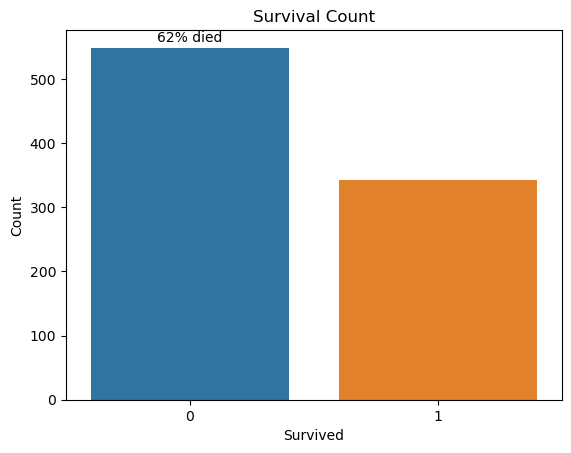

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data, x="Survived")
death_percent = round(data["Survived"].value_counts(normalize=True)[0] * 100)

plt.text(0, data["Survived"].value_counts()[0] + 10, f"{death_percent}% died", ha="center")

plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count")

plt.show()


male      64.758698
female    35.241302
Name: Sex, dtype: float64


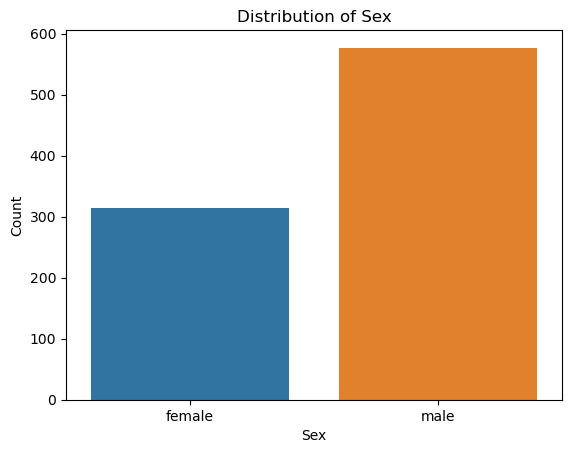

In [178]:
sex_percentage = data["Sex"].value_counts(normalize=True) * 100

print(sex_percentage)

sns.countplot(data=data, x="Sex")

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")

plt.show()


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


Text(0.5, 1.0, 'Distribution of Embarked')

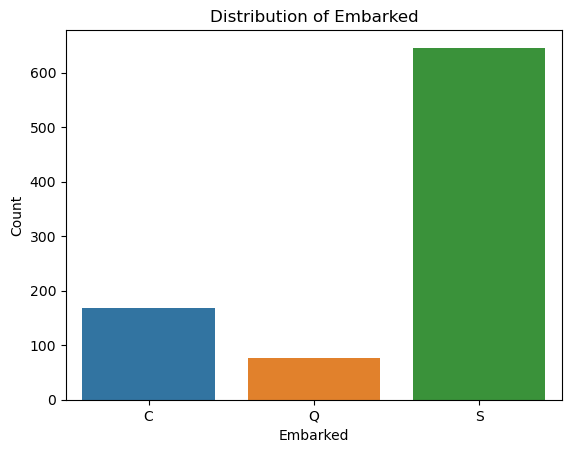

In [180]:
embarked_percentage = data["Embarked"].value_counts(normalize=True) * 100
print(embarked_percentage)
sns.countplot(data=data, x="Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Distribution of Embarked")

<Axes: >

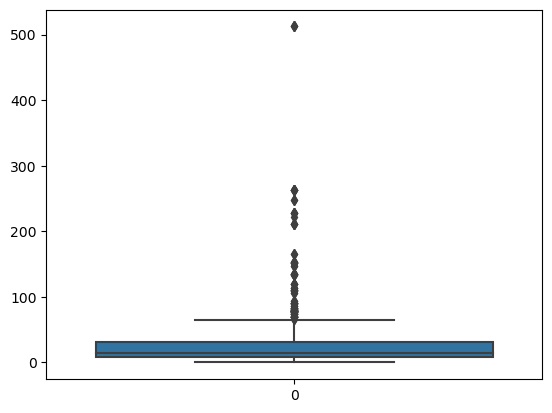

In [202]:
sns.boxplot(data["Fare"])

In [205]:
print("people with the Fare in betbeen 200 to 300 are: " + str(data[(data["Fare"]>200) & (data["Fare"]<300)].shape[0]))
print("people with the Fare in betbeen 200 to 300 are: " + str(data[(data["Fare"]>300)].shape[0]))


people with the Fare in betbeen 200 to 300 are: 17
people with the Fare in betbeen 200 to 300 are: 3


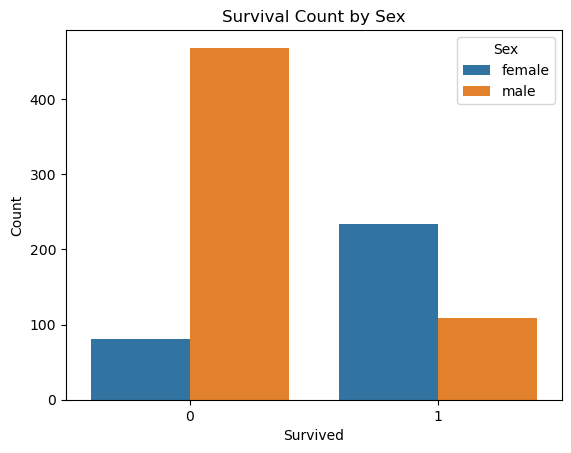

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


In [209]:
sns.countplot(data=data, x="Survived", hue="Sex")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count by Sex")
plt.show()

# Calculate the percentage of survivors and non-survivors by sex
cross_tab = pd.crosstab(data["Sex"], data["Survived"], normalize="index") * 100


print(cross_tab)


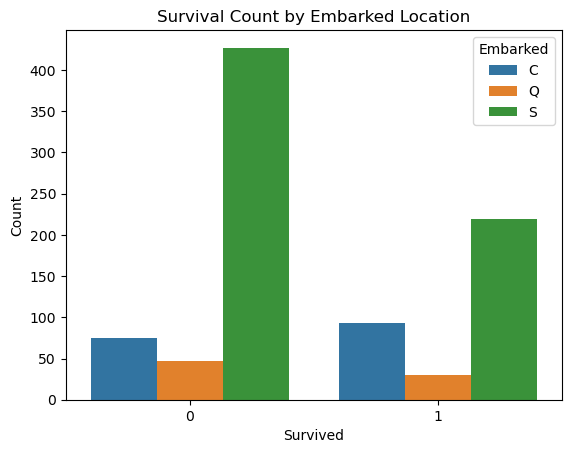

Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.099071  33.900929


In [211]:
sns.countplot(data=data, x="Survived", hue="Embarked")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count by Embarked Location")
plt.show()

# Calculate the percentage of survivors and non-survivors by embarked location
cross_tab = pd.crosstab(data["Embarked"], data["Survived"], normalize="index") * 100
print(cross_tab)

<Axes: >

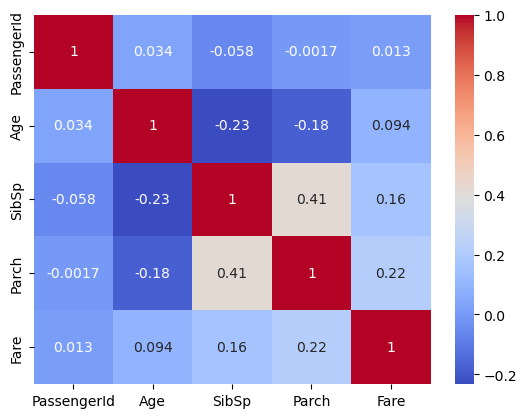

In [212]:
sns.heatmap(dfcr,annot=True,cmap="coolwarm")

<Figure size 600x600 with 0 Axes>

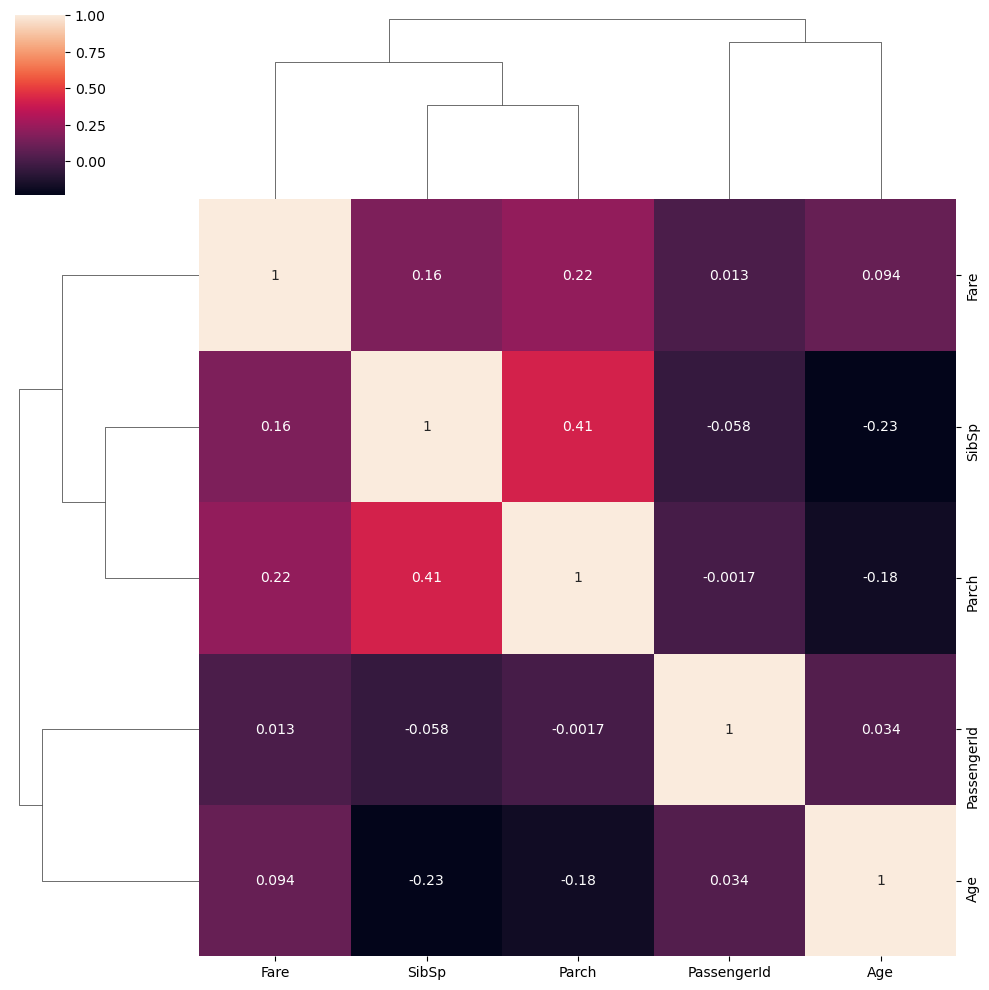

In [213]:
plt.figure(figsize=(6,6))
sns.clustermap(dfcr,annot=True)

In [214]:
data["Family_size"] = data["SibSp"] + data["Parch"]

In [215]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
83,84,0,1,"Carrau, Mr. Francisco M",male,1,0,0,113059,47.1000,S,0
522,523,0,3,"Lahoud, Mr. Sarkis",male,1,0,0,2624,7.2250,C,0
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,1,3,0,3101278,15.8500,S,3
397,398,0,2,"McKane, Mr. Peter David",male,1,0,0,28403,26.0000,S,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,1,1,0,345763,18.0000,S,1
336,337,0,1,"Pears, Mr. Thomas Clinton",male,1,1,0,113776,66.6000,S,1
643,644,1,3,"Foo, Mr. Choong",male,1,0,0,1601,56.4958,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,1,0,0,239854,0.0000,S,0
663,664,0,3,"Coleff, Mr. Peju",male,1,0,0,349210,7.4958,S,0
514,515,0,3,"Coleff, Mr. Satio",male,1,0,0,349209,7.4958,S,0


In [216]:
def family_type(number):
    if number ==0:
        return "Alone"
    elif number >0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [218]:
data["Family_type"] = data["Family_size"].apply(family_type)
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,1,1,1,347054,10.4625,S,2,Medium
737,738,1,1,"Lesurer, Mr. Gustave J",male,1,0,0,PC 17755,512.3292,C,0,Alone
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,1,1,4,347088,27.9000,S,5,Large
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,1,0,0,PC 17595,28.7125,C,0,Alone
583,584,0,1,"Ross, Mr. John Hugo",male,1,0,0,13049,40.1250,C,0,Alone
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,1,1,0,36973,83.4750,S,1,Medium
210,211,0,3,"Ali, Mr. Ahmed",male,1,0,0,SOTON/O.Q. 3101311,7.0500,S,0,Alone
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,1,0,0,C 7075,6.4500,S,0,Alone
388,389,0,3,"Sadlier, Mr. Matthew",male,1,0,0,367655,7.7292,Q,0,Alone
88,89,1,1,"Fortune, Miss. Mabel Helen",female,1,3,2,19950,263.0000,S,5,Large


In [219]:
data.drop(columns=["SibSp","Parch","Family_size"],inplace=True)

In [222]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Family_type'],
      dtype='object')

In [223]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,1,2626,7.2292,C,Alone
169,170,0,3,"Ling, Mr. Lee",male,1,1601,56.4958,S,Alone
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,1,PC 17475,26.2875,S,Alone
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,1,13507,55.9000,S,Medium
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,1,13568,49.5000,C,Medium


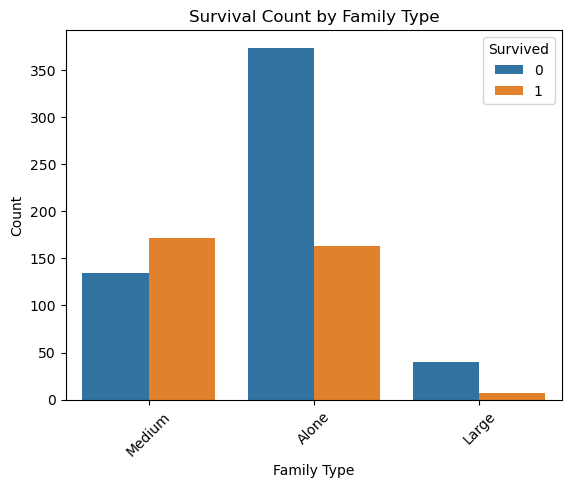

Survived             0          1
Family_type                      
Alone        69.646182  30.353818
Large        85.106383  14.893617
Medium       43.973941  56.026059


In [226]:
sns.countplot(data=data, x="Family_type", hue="Survived")
plt.xlabel("Family Type")
plt.ylabel("Count")
plt.title("Survival Count by Family Type")

plt.xticks(rotation=45)  
plt.show()


cross_tab = pd.crosstab(data["Family_type"], data["Survived"], normalize="index") * 100

print(cross_tab)

In [234]:
df =pd.get_dummies(data=data ,columns=["Pclass","Sex","Embarked","Family_type"],drop_first=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18892\1943617521.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="summer",annot=True)


<Axes: >

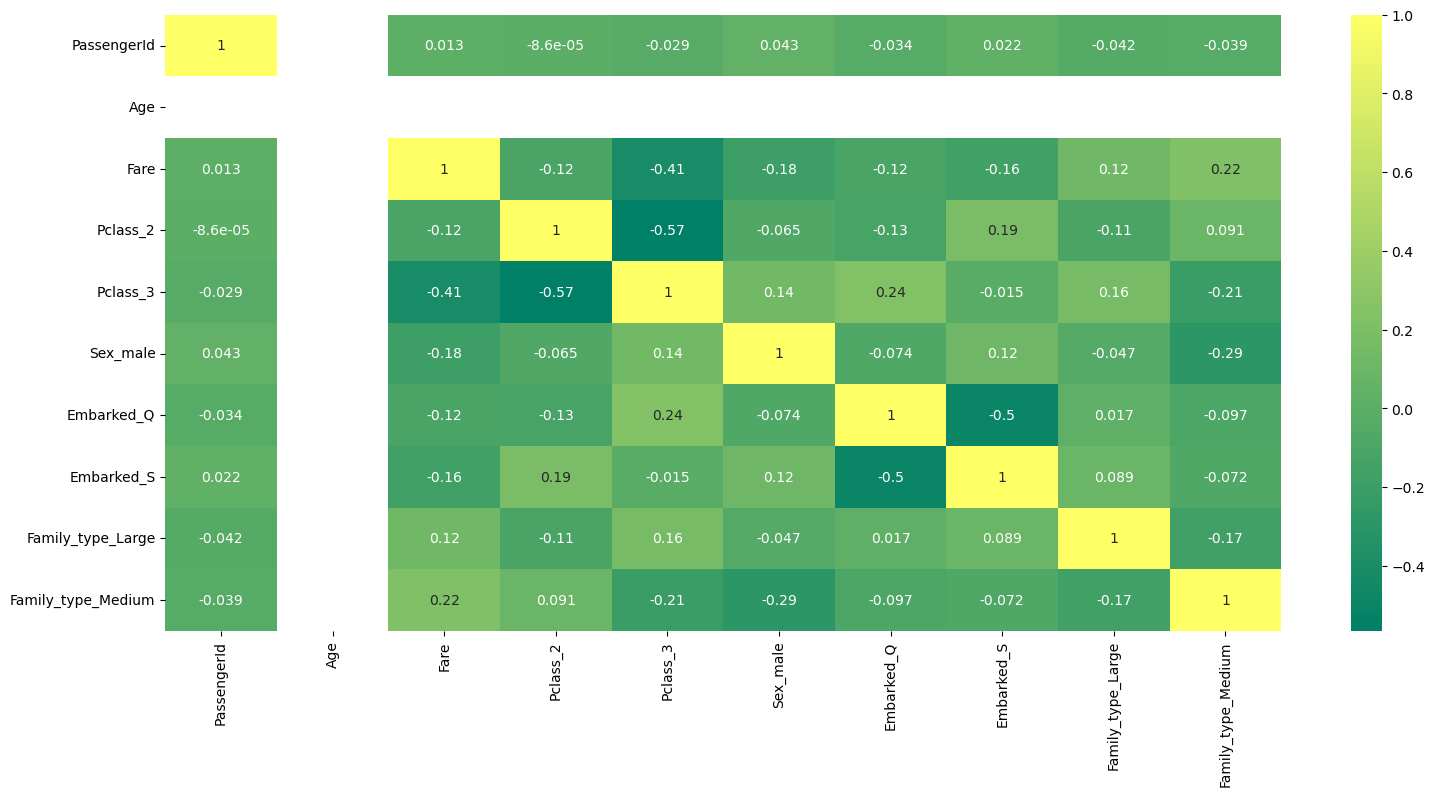

In [235]:
# understanding relationships between variables
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),cmap="summer",annot=True)